In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [28]:
test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [29]:
test_data_dir='Test-Waste'
class_subset=['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 205 images belonging to 7 classes.


In [4]:
class_indices = testgen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
print(class_indices)

{0: 'cardboard', 1: 'ewaste', 2: 'glass', 3: 'metal', 4: 'organic', 5: 'paper', 6: 'plastic'}


In [5]:
#model_path = 'Dense_1_f.h5'
#model=load_model(model_path,compile=False)

In [6]:
#test_labels = testgen.classes
#predictions = model.predict_generator(testgen, steps=205, verbose=1)

In [7]:
#print(predictions.argmax(axis=1))

Testing: VGG

Name: vgg16_b32_f.h5

In [8]:
true_classes = testgen.classes

In [9]:
model_path = 'vgg16_b32_f.h5'
model = load_model(model_path)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
vgg_preds = model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [12]:
vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model 1 Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model 1 Accuracy without Fine-Tuning: 96.59%


Name: vgg16_b16_f.h5

In [13]:
model_path2 = 'vgg16_b16_f.h5'
model2 = load_model(model_path2)

In [14]:
vgg_preds2 = model2.predict(testgen)
vgg_pred_classes2 = np.argmax(vgg_preds2, axis=1)

In [15]:
vgg_acc2 = accuracy_score(true_classes, vgg_pred_classes2)
print("VGG16 Model 2 Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc2 * 100))

VGG16 Model 2 Accuracy without Fine-Tuning: 86.83%


Name: vgg16_b32_t.h5

In [16]:
model_path3 = 'vgg16_b32_t.h5'
model3 = load_model(model_path3)

In [17]:
vgg_preds3 = model3.predict(testgen)
vgg_pred_classes3 = np.argmax(vgg_preds3, axis=1)

In [20]:
vgg_acc3 = accuracy_score(true_classes, vgg_pred_classes3)
print("VGG16 Model 3 Accuracy with Base Model Trainable: {:.2f}%".format(vgg_acc3 * 100))

VGG16 Model 3 Accuracy with Base Model Trainable: 85.37%


In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [24]:
class_names = testgen.class_indices.keys()
print(class_names)

dict_keys(['cardboard', 'ewaste', 'glass', 'metal', 'organic', 'paper', 'plastic'])


In [25]:
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

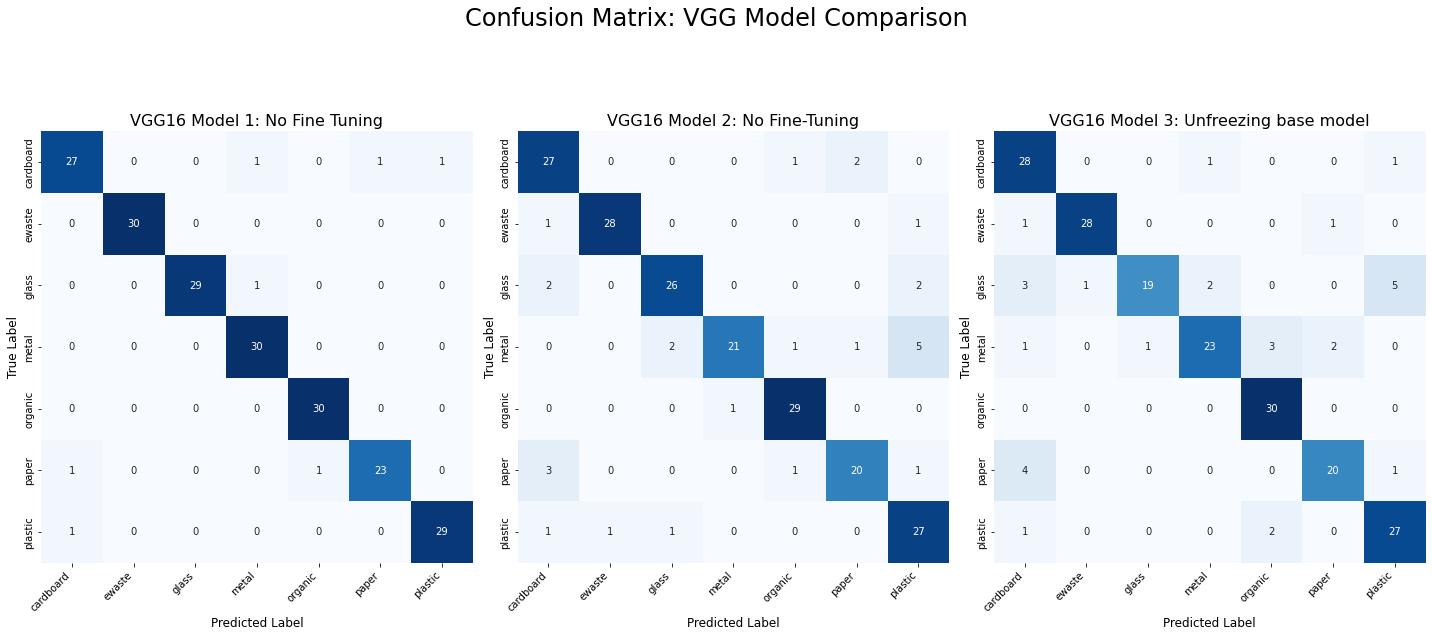

In [29]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
plot_heatmap(true_classes, vgg_pred_classes, class_names, ax1, title="VGG16 Model 1: No Fine Tuning")    
plot_heatmap(true_classes, vgg_pred_classes2, class_names, ax2, title="VGG16 Model 2: No Fine-Tuning")    
plot_heatmap(true_classes, vgg_pred_classes3, class_names, ax3, title="VGG16 Model 3: Unfreezing base model")    

fig.suptitle("Confusion Matrix: VGG Model Comparison", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1)
plt.show()

Testing 2: ResNet50v2

In [2]:
test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input)

In [3]:
test_data_dir='Test-Waste'
class_subset=['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 205 images belonging to 7 classes.


In [4]:
class_indices = testgen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
print(class_indices)

{0: 'cardboard', 1: 'ewaste', 2: 'glass', 3: 'metal', 4: 'organic', 5: 'paper', 6: 'plastic'}


In [5]:
true_classes = testgen.classes

In [6]:
model_path = 'resnet_1_f.h5'
model = load_model(model_path)

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
res_preds = model.predict(testgen)
res_pred_classes = np.argmax(res_preds, axis=1)

In [9]:
res_acc = accuracy_score(true_classes, res_pred_classes)
print("ResNet50v2 Model 1 Accuracy without Fine-Tuning: {:.2f}%".format(res_acc * 100))

ResNet50v2 Model 1 Accuracy without Fine-Tuning: 77.07%


In [10]:
model_path2 = 'resnet_1_t.h5'
model2 = load_model(model_path2)

In [11]:
res_preds2 = model2.predict(testgen)
res_pred_classes2 = np.argmax(res_preds2, axis=1)

In [13]:
res_acc2 = accuracy_score(true_classes, res_pred_classes2)
print("ResNet50v2 Model 1 Accuracy with Fine-Tuning: {:.2f}%".format(res_acc2 * 100))

ResNet50v2 Model 1 Accuracy with Fine-Tuning: 81.46%


In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = testgen.class_indices.keys()
print(class_names)

dict_keys(['cardboard', 'ewaste', 'glass', 'metal', 'organic', 'paper', 'plastic'])


In [21]:
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

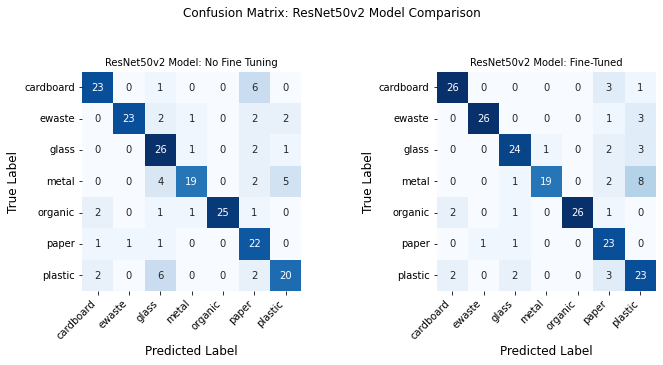

In [29]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot_heatmap(true_classes, res_pred_classes, class_names, ax1, title="ResNet50v2 Model: No Fine Tuning")    
plot_heatmap(true_classes, res_pred_classes2, class_names, ax2, title="ResNet50v2 Model: Fine-Tuned")     

fig.suptitle("Confusion Matrix: ResNet50v2 Model Comparison", fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.8)
plt.show()

Testing 3: DenseNet121

In [33]:
test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)

In [34]:
test_data_dir='Test-Waste'
class_subset=['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 205 images belonging to 7 classes.


In [4]:
true_classes = testgen.classes
class_indices = testgen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
print(class_indices)

{0: 'cardboard', 1: 'ewaste', 2: 'glass', 3: 'metal', 4: 'organic', 5: 'paper', 6: 'plastic'}


In [5]:
model_path = 'Dense_1_f.h5'
model = load_model(model_path)

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
dense_preds = model.predict(testgen)
dense_pred_classes = np.argmax(dense_preds, axis=1)

In [8]:
dense_acc = accuracy_score(true_classes, dense_pred_classes)
print("DenseNet Model Accuracy without Fine-Tuning: {:.2f}%".format(dense_acc * 100))

DenseNet Model Accuracy without Fine-Tuning: 84.39%


In [9]:
model_path2 = 'Dense_1_t.h5'
model2 = load_model(model_path2)

In [10]:
dense_preds2 = model2.predict(testgen)
dense_pred_classes2 = np.argmax(dense_preds2, axis=1)

In [11]:
dense_acc2 = accuracy_score(true_classes, dense_pred_classes2)
print("DenseNet Model Accuracy with Fine-Tuning: {:.2f}%".format(dense_acc2 * 100))

DenseNet Model Accuracy with Fine-Tuning: 87.32%


In [12]:
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = testgen.class_indices.keys()
print(class_names)

dict_keys(['cardboard', 'ewaste', 'glass', 'metal', 'organic', 'paper', 'plastic'])


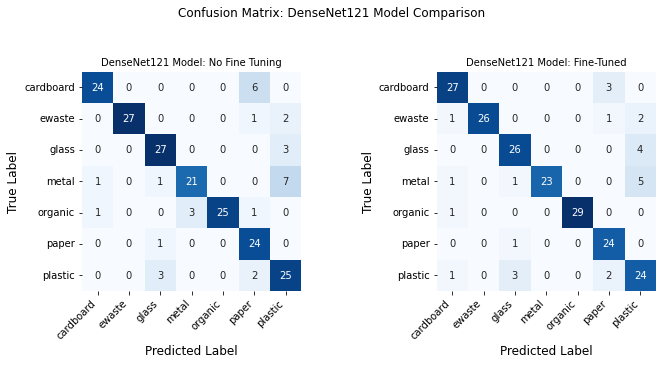

In [16]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot_heatmap(true_classes, dense_pred_classes, class_names, ax1, title="DenseNet121 Model: No Fine Tuning")    
plot_heatmap(true_classes, dense_pred_classes2, class_names, ax2, title="DenseNet121 Model: Fine-Tuned")     

fig.suptitle("Confusion Matrix: DenseNet121 Model Comparison", fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.8)
plt.show()

Testing 4: Inceptionv3

In [44]:
test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

In [45]:
test_data_dir='Test-Waste'
class_subset=['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 205 images belonging to 7 classes.


In [4]:
true_classes = testgen.classes
class_indices = testgen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
print(class_indices)

{0: 'cardboard', 1: 'ewaste', 2: 'glass', 3: 'metal', 4: 'organic', 5: 'paper', 6: 'plastic'}


In [5]:
model_path = 'inception_1_f.h5'
model = load_model(model_path)

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
inc_preds = model.predict(testgen)
inc_pred_classes = np.argmax(inc_preds, axis=1)

In [8]:
inc_acc = accuracy_score(true_classes, inc_pred_classes)
print("Inceptionv3 Model 1 Accuracy with Fine-Tuning: {:.2f}%".format(inc_acc * 100))

Inceptionv3 Model 1 Accuracy with Fine-Tuning: 86.83%


In [10]:
model_path2 = 'inception_2_f.h5'
model2 = load_model(model_path2)

In [11]:
inc_preds2 = model2.predict(testgen)
inc_pred_classes2 = np.argmax(inc_preds2, axis=1)

In [12]:
inc_acc2 = accuracy_score(true_classes, inc_pred_classes2)
print("Inceptionv3 Model 2 Accuracy without Fine-Tuning: {:.2f}%".format(inc_acc2 * 100))

Inceptionv3 Model 2 Accuracy without Fine-Tuning: 84.88%


In [13]:
model_path3 = 'inception_2_t.h5'
model3 = load_model(model_path3)

In [14]:
inc_preds3 = model3.predict(testgen)
inc_pred_classes3 = np.argmax(inc_preds3, axis=1)

In [15]:
inc_acc3 = accuracy_score(true_classes, inc_pred_classes3)
print("Inceptionv3 Model 2 Accuracy with Fine-Tuning: {:.2f}%".format(inc_acc3 * 100))

Inceptionv3 Model 2 Accuracy with Fine-Tuning: 88.78%


In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = testgen.class_indices.keys()
print(class_names)

dict_keys(['cardboard', 'ewaste', 'glass', 'metal', 'organic', 'paper', 'plastic'])


In [17]:
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

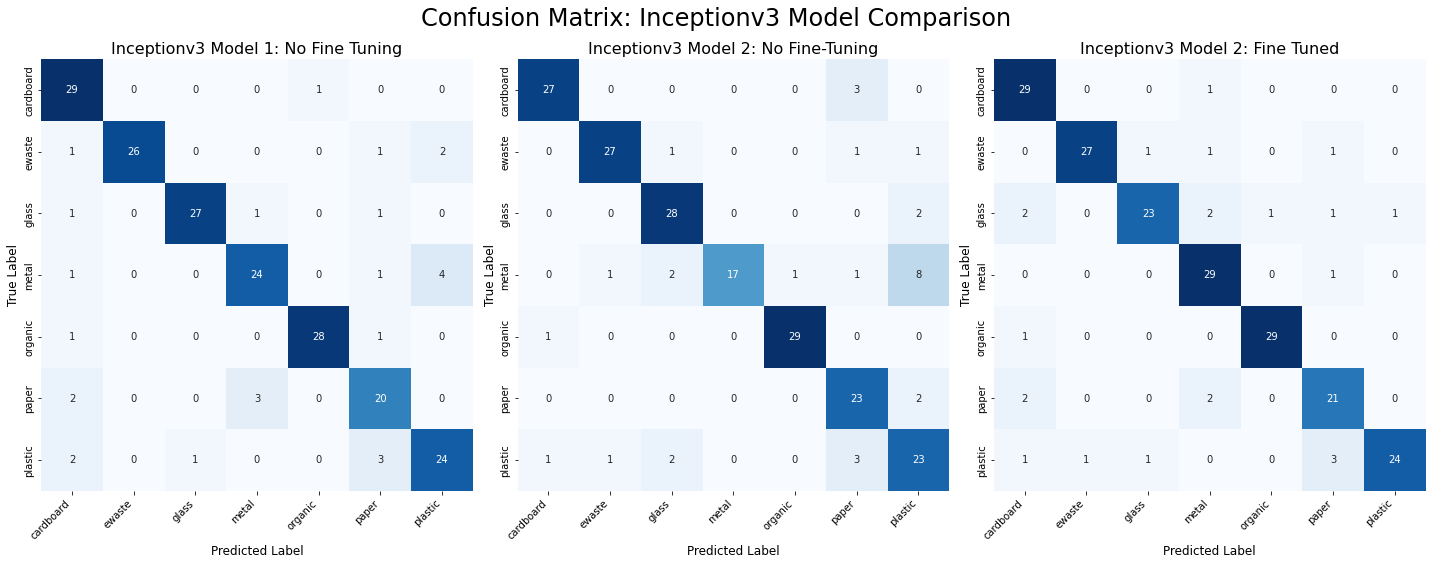

In [19]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
plot_heatmap(true_classes, inc_pred_classes, class_names, ax1, title="Inceptionv3 Model 1: No Fine Tuning")    
plot_heatmap(true_classes, inc_pred_classes2, class_names, ax2, title="Inceptionv3 Model 2: No Fine-Tuning")    
plot_heatmap(true_classes, inc_pred_classes3, class_names, ax3, title="Inceptionv3 Model 2: Fine Tuned")    

fig.suptitle("Confusion Matrix: Inceptionv3 Model Comparison", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

Testing 5: MobileNetv2

In [2]:
test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [3]:
test_data_dir='Test-Waste'
class_subset=['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 205 images belonging to 7 classes.


In [4]:
true_classes = testgen.classes
class_indices = testgen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
print(class_indices)

{0: 'cardboard', 1: 'ewaste', 2: 'glass', 3: 'metal', 4: 'organic', 5: 'paper', 6: 'plastic'}


In [5]:
model_path = 'mbnet_1_f.h5'
model = load_model(model_path)

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
mb_preds = model.predict(testgen)
mb_pred_classes = np.argmax(mb_preds, axis=1)

In [9]:
mb_acc = accuracy_score(true_classes, mb_pred_classes)
print("MobileNetv2 Model 1 Accuracy without Fine-Tuning: {:.2f}%".format(mb_acc * 100))

MobileNetv2 Model 1 Accuracy without Fine-Tuning: 79.51%


In [10]:
model_path2 = 'mbnet_1_t.h5'
model2 = load_model(model_path2)

In [11]:
mb_preds2 = model2.predict(testgen)
mb_pred_classes2 = np.argmax(mb_preds2, axis=1)

In [12]:
mb_acc2 = accuracy_score(true_classes, mb_pred_classes2)
print("MobileNetv2 Model 1 Accuracy with Fine-Tuning: {:.2f}%".format(mb_acc2 * 100))

MobileNetv2 Model 1 Accuracy with Fine-Tuning: 81.46%


In [13]:
model_path3 = 'mbnet_2_f.h5'
model3 = load_model(model_path3)

In [14]:
mb_preds3 = model3.predict(testgen)
mb_pred_classes3 = np.argmax(mb_preds3, axis=1)

In [15]:
mb_acc3 = accuracy_score(true_classes, mb_pred_classes3)
print("MobileNetv2 Model 2 Accuracy without Fine-Tuning: {:.2f}%".format(mb_acc3 * 100))

MobileNetv2 Model 2 Accuracy without Fine-Tuning: 80.00%


In [16]:
model_path4 = 'mbnet_2_t.h5'
model4 = load_model(model_path4)

In [17]:
mb_preds4 = model4.predict(testgen)
mb_pred_classes4 = np.argmax(mb_preds4, axis=1)

In [18]:
mb_acc4 = accuracy_score(true_classes, mb_pred_classes4)
print("MobileNetv2 Model 2 Accuracy with Fine-Tuning: {:.2f}%".format(mb_acc4 * 100))

MobileNetv2 Model 2 Accuracy with Fine-Tuning: 73.66%


In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = testgen.class_indices.keys()
print(class_names)

dict_keys(['cardboard', 'ewaste', 'glass', 'metal', 'organic', 'paper', 'plastic'])


In [20]:
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

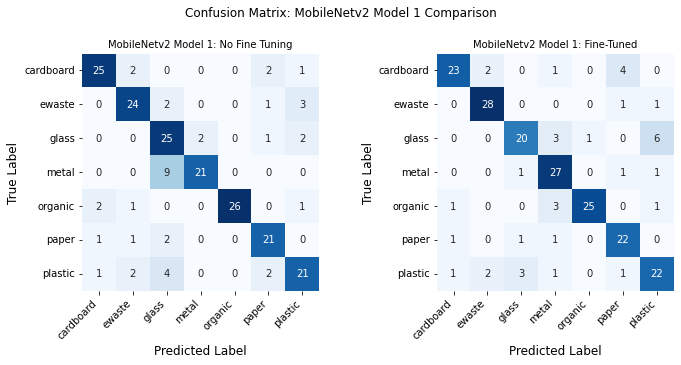

In [22]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot_heatmap(true_classes, mb_pred_classes, class_names, ax1, title="MobileNetv2 Model 1: No Fine Tuning")    
plot_heatmap(true_classes, mb_pred_classes2, class_names, ax2, title="MobileNetv2 Model 1: Fine-Tuned")     

fig.suptitle("Confusion Matrix: MobileNetv2 Model 1 Comparison", fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

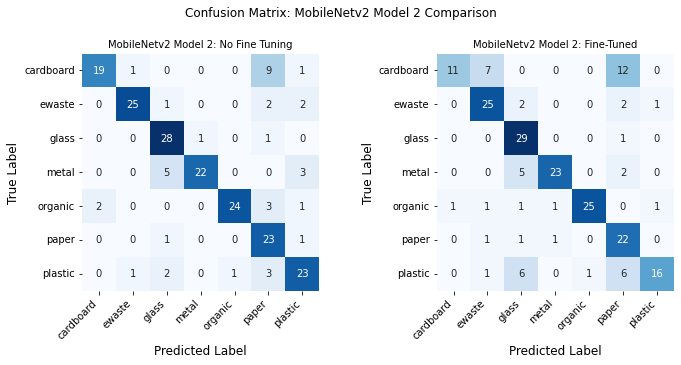

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot_heatmap(true_classes, mb_pred_classes3, class_names, ax1, title="MobileNetv2 Model 2: No Fine Tuning")    
plot_heatmap(true_classes, mb_pred_classes4, class_names, ax2, title="MobileNetv2 Model 2: Fine-Tuned")     

fig.suptitle("Confusion Matrix: MobileNetv2 Model 2 Comparison", fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

Testing 6: NASNetMobile

In [2]:
test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.nasnet.preprocess_input)

In [3]:
test_data_dir='Test-Waste'
class_subset=['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 205 images belonging to 7 classes.


In [4]:
true_classes = testgen.classes
class_indices = testgen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
print(class_indices)

{0: 'cardboard', 1: 'ewaste', 2: 'glass', 3: 'metal', 4: 'organic', 5: 'paper', 6: 'plastic'}


In [6]:
model_path = 'nasnetm_b32_f.h5'
model = load_model(model_path)

In [5]:
from sklearn.metrics import accuracy_score

In [8]:
nas_preds = model.predict(testgen)
nas_pred_classes = np.argmax(nas_preds, axis=1)

In [9]:
nas_acc = accuracy_score(true_classes, nas_pred_classes)
print("NASNetMobile Model 1 Accuracy without Fine-Tuning: {:.2f}%".format(nas_acc * 100))

NASNetMobile Model 1 Accuracy without Fine-Tuning: 84.39%


In [10]:
model_path2 = 'nasnetm2_b32_f.h5'
model2 = load_model(model_path2)

In [11]:
nas_preds2 = model2.predict(testgen)
nas_pred_classes2 = np.argmax(nas_preds2, axis=1)

In [12]:
nas_acc2 = accuracy_score(true_classes, nas_pred_classes2)
print("NASNetMobile Model 2 Accuracy without Fine-Tuning: {:.2f}%".format(nas_acc2 * 100))

NASNetMobile Model 2 Accuracy without Fine-Tuning: 84.88%


In [6]:
model_path3 = 'nasnetm3_b32_f.h5'
model3 = load_model(model_path3)

In [7]:
nas_preds3 = model3.predict(testgen)
nas_pred_classes3 = np.argmax(nas_preds3, axis=1)

In [8]:
nas_acc3 = accuracy_score(true_classes, nas_pred_classes3)
print("NASNetMobile Model 3 Accuracy without Fine-Tuning: {:.2f}%".format(nas_acc3 * 100))

NASNetMobile Model 3 Accuracy without Fine-Tuning: 86.34%


In [9]:
model_path4 = 'nasnetm4_t.h5'
model4 = load_model(model_path4)

In [17]:
nas_preds4 = model4.predict(testgen)
nas_pred_classes4 = np.argmax(nas_preds4, axis=1)

In [18]:
nas_acc4 = accuracy_score(true_classes, nas_pred_classes4)
print("NASNetMobile Model 4 Accuracy with Fine-Tuning: {:.2f}%".format(nas_acc4 * 100))

NASNetMobile Model 4 Accuracy with Fine-Tuning: 82.93%


In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = testgen.class_indices.keys()
print(class_names)

dict_keys(['cardboard', 'ewaste', 'glass', 'metal', 'organic', 'paper', 'plastic'])


In [20]:
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

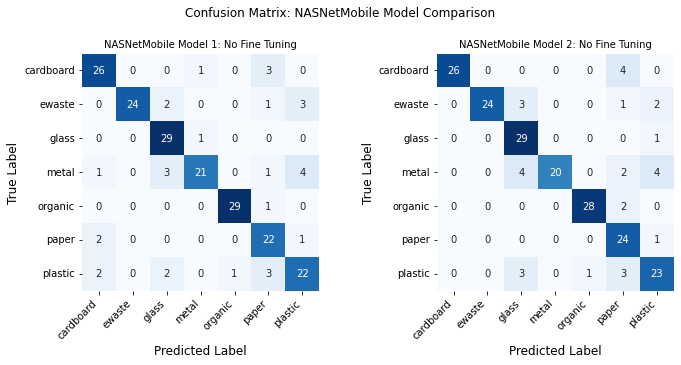

In [21]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot_heatmap(true_classes, nas_pred_classes, class_names, ax1, title="NASNetMobile Model 1: No Fine Tuning")    
plot_heatmap(true_classes, nas_pred_classes2, class_names, ax2, title="NASNetMobile Model 2: No Fine Tuning")     

fig.suptitle("Confusion Matrix: NASNetMobile Model Comparison", fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

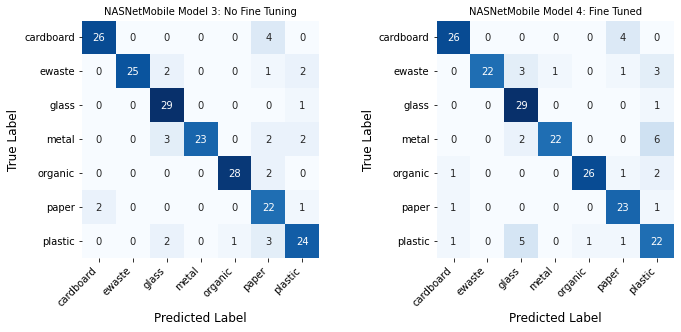

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot_heatmap(true_classes, nas_pred_classes3, class_names, ax1, title="NASNetMobile Model 3: No Fine Tuning")    
plot_heatmap(true_classes, nas_pred_classes4, class_names, ax2, title="NASNetMobile Model 4: Fine Tuned")     

fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

Printing Confusion Report

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
test_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [3]:
test_data_dir='Test-Waste'
class_subset=['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 205 images belonging to 7 classes.


In [4]:
true_classes = testgen.classes
class_indices = testgen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
print(class_indices)

{0: 'cardboard', 1: 'ewaste', 2: 'glass', 3: 'metal', 4: 'organic', 5: 'paper', 6: 'plastic'}


In [5]:
model_path = 'vgg16_b32_f.h5'
model = load_model(model_path)

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
vgg_preds = model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [8]:
vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model 1 Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model 1 Accuracy without Fine-Tuning: 96.59%


In [10]:
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

In [11]:
import seaborn as sns
class_names = testgen.class_indices.keys()
print(class_names)

dict_keys(['cardboard', 'ewaste', 'glass', 'metal', 'organic', 'paper', 'plastic'])


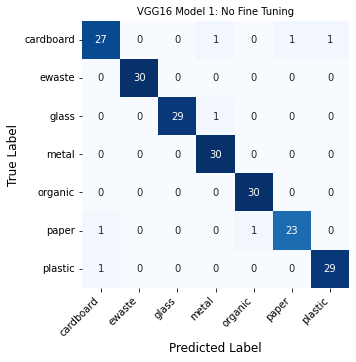

In [19]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))
plot_heatmap(true_classes, vgg_pred_classes, class_names, ax1, title="VGG16 Model 1: No Fine Tuning")      

fig.tight_layout()
fig.subplots_adjust(top=1)
plt.show()

In [20]:
test_labels = true_classes

In [21]:
cm = confusion_matrix(test_labels, vgg_pred_classes)
cm_plot_labels = ['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
print(cm)

[[27  0  0  1  0  1  1]
 [ 0 30  0  0  0  0  0]
 [ 0  0 29  1  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 1  0  0  0  1 23  0]
 [ 1  0  0  0  0  0 29]]


In [22]:
print(classification_report(test_labels, vgg_pred_classes , target_names=cm_plot_labels))

              precision    recall  f1-score   support

   cardboard       0.93      0.90      0.92        30
      ewaste       1.00      1.00      1.00        30
       glass       1.00      0.97      0.98        30
       metal       0.94      1.00      0.97        30
     organic       0.97      1.00      0.98        30
       paper       0.96      0.92      0.94        25
     plastic       0.97      0.97      0.97        30

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205



In [6]:
#1:https://www.kaggle.com/filmer2002/ss-garbage
test_labels = true_classes
predictions = model.predict_generator(testgen, verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
205/205 [==============================] - 65s 319ms/step


In [7]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))
cm_plot_labels = ['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
print(cm)

[[27  0  0  0  1  2  0]
 [ 1 28  0  0  0  0  1]
 [ 2  0 26  0  0  0  2]
 [ 0  0  2 21  1  1  5]
 [ 0  0  0  1 29  0  0]
 [ 3  0  0  0  1 20  1]
 [ 1  1  1  0  0  0 27]]


In [8]:
print(classification_report(test_labels, predictions.argmax(axis=1), target_names=cm_plot_labels))

              precision    recall  f1-score   support

   cardboard       0.79      0.90      0.84        30
      ewaste       0.97      0.93      0.95        30
       glass       0.90      0.87      0.88        30
       metal       0.95      0.70      0.81        30
     organic       0.91      0.97      0.94        30
       paper       0.87      0.80      0.83        25
     plastic       0.75      0.90      0.82        30

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



Testing 7: CNN

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
test_data_dir='Test-Waste'
class_subset=['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             class_mode=None,
                                             classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

In [ ]:
true_classes = testgen.classes
class_indices = testgen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
print(class_indices)

In [ ]:
model_path = 'cnn_1.h5'
model = load_model(model_path)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
cnn_preds = model.predict(testgen)
cnn_pred_classes = np.argmax(cnn_preds, axis=1)

In [ ]:
cnn_acc = accuracy_score(true_classes, cnn_pred_classes)
print("NASNetMobile Model 1 Accuracy without Fine-Tuning: {:.2f}%".format(cnn_acc * 100))

In [1]:
import requests

In [3]:
import json

In [3]:
post_url = "http://127.0.0.1:5000/process"
input_image = {"img": open("test3.jpg", "rb")}
response_1 = requests.post(post_url, files=input_image)
print(response_1.text)

plastic


In [5]:
url = "http://127.0.0.1:5000/process"
filess = {"img": open("test2.jpg", "rb")}
results = requests.post(url, files=filess)
print(results.text)

glass


In [5]:
import requests
url = "https://cnn-flask-try.herokuapp.com/process"
filess = {"img": open("test1.jpg", "rb")}
results = requests.post(url, files=filess)
print(results.text)

ewaste


In [3]:
post_url = "https://cnn-flask-try.herokuapp.com/process"
input_image = {"img": open("test2.jpg", "rb")}
response_1 = requests.post(post_url, files=input_image)
print(response_1.text)

glass


In [15]:
#FastAPI
url = "http://127.0.0.1:8000/predict"
filess = {"file": open("test4.jpg", "rb")}
results = requests.post(url, files=filess)
print(results.text)

"plastic"


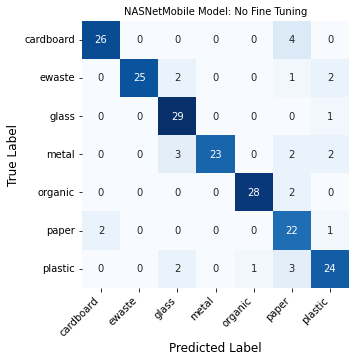

In [14]:
#Update-Report
#NASNetMobile
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))
plot_heatmap(true_classes, nas_pred_classes3, class_names, ax1, title="NASNetMobile Model: No Fine Tuning")      

fig.tight_layout()
fig.subplots_adjust(top=1)
plt.show()

In [19]:
test_labels = true_classes
cm = confusion_matrix(test_labels, nas_pred_classes3)
cm_plot_labels = ['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
print(cm)

[[26  0  0  0  0  4  0]
 [ 0 25  2  0  0  1  2]
 [ 0  0 29  0  0  0  1]
 [ 0  0  3 23  0  2  2]
 [ 0  0  0  0 28  2  0]
 [ 2  0  0  0  0 22  1]
 [ 0  0  2  0  1  3 24]]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, nas_pred_classes3 , target_names=cm_plot_labels))

              precision    recall  f1-score   support

   cardboard       0.93      0.87      0.90        30
      ewaste       1.00      0.83      0.91        30
       glass       0.81      0.97      0.88        30
       metal       1.00      0.77      0.87        30
     organic       0.97      0.93      0.95        30
       paper       0.65      0.88      0.75        25
     plastic       0.80      0.80      0.80        30

    accuracy                           0.86       205
   macro avg       0.88      0.86      0.86       205
weighted avg       0.88      0.86      0.87       205



In [35]:
#Densenet
model_path2 = 'Dense_1_t.h5'
model2 = load_model(model_path2)

In [36]:
dense_preds2 = model2.predict(testgen)
dense_pred_classes2 = np.argmax(dense_preds2, axis=1)

In [37]:
dense_acc2 = accuracy_score(true_classes, dense_pred_classes2)
print("DenseNet Model Accuracy with Fine-Tuning: {:.2f}%".format(dense_acc2 * 100))

DenseNet Model Accuracy with Fine-Tuning: 87.32%


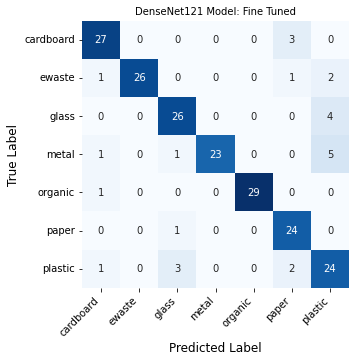

In [38]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))
plot_heatmap(true_classes, dense_pred_classes2, class_names, ax1, title="DenseNet121 Model: Fine Tuned")      

fig.tight_layout()
fig.subplots_adjust(top=1)
plt.show()

In [42]:
test_labels = true_classes
cm = confusion_matrix(test_labels, dense_pred_classes2)
cm_plot_labels = ['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
print(cm)

[[27  0  0  0  0  3  0]
 [ 1 26  0  0  0  1  2]
 [ 0  0 26  0  0  0  4]
 [ 1  0  1 23  0  0  5]
 [ 1  0  0  0 29  0  0]
 [ 0  0  1  0  0 24  0]
 [ 1  0  3  0  0  2 24]]


In [43]:
print(classification_report(test_labels, dense_pred_classes2 , target_names=cm_plot_labels))

              precision    recall  f1-score   support

   cardboard       0.87      0.90      0.89        30
      ewaste       1.00      0.87      0.93        30
       glass       0.84      0.87      0.85        30
       metal       1.00      0.77      0.87        30
     organic       1.00      0.97      0.98        30
       paper       0.80      0.96      0.87        25
     plastic       0.69      0.80      0.74        30

    accuracy                           0.87       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.87      0.88       205



In [25]:
#VGG
model_path = 'vgg16_b32_f.h5'
model = load_model(model_path)

In [30]:
vgg_preds = model.predict(testgen)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [31]:
vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model 1 Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model 1 Accuracy without Fine-Tuning: 96.59%


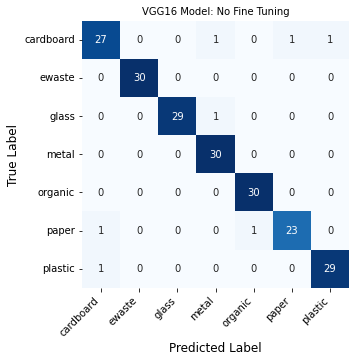

In [32]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))
plot_heatmap(true_classes, vgg_pred_classes, class_names, ax1, title="VGG16 Model: No Fine Tuning")      

fig.tight_layout()
fig.subplots_adjust(top=1)
plt.show()

In [39]:
test_labels = true_classes
cm = confusion_matrix(test_labels, vgg_pred_classes)
cm_plot_labels = ['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
print(cm)

[[27  0  0  1  0  1  1]
 [ 0 30  0  0  0  0  0]
 [ 0  0 29  1  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 1  0  0  0  1 23  0]
 [ 1  0  0  0  0  0 29]]


In [41]:
print(classification_report(test_labels, vgg_pred_classes , target_names=cm_plot_labels))

              precision    recall  f1-score   support

   cardboard       0.93      0.90      0.92        30
      ewaste       1.00      1.00      1.00        30
       glass       1.00      0.97      0.98        30
       metal       0.94      1.00      0.97        30
     organic       0.97      1.00      0.98        30
       paper       0.96      0.92      0.94        25
     plastic       0.97      0.97      0.97        30

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205



In [46]:
#Inception
model_path3 = 'inception_2_t.h5'
model3 = load_model(model_path3)

In [47]:
inc_preds3 = model3.predict(testgen)
inc_pred_classes3 = np.argmax(inc_preds3, axis=1)

In [48]:
inc_acc3 = accuracy_score(true_classes, inc_pred_classes3)
print("Inceptionv3 Model 2 Accuracy with Fine-Tuning: {:.2f}%".format(inc_acc3 * 100))

Inceptionv3 Model 2 Accuracy with Fine-Tuning: 88.78%


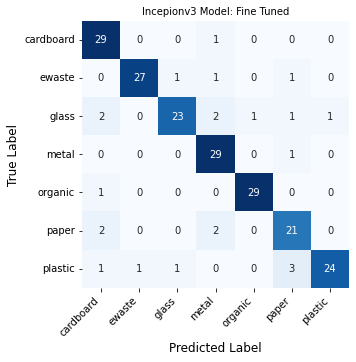

In [50]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))
plot_heatmap(true_classes, inc_pred_classes3, class_names, ax1, title="Incepionv3 Model: Fine Tuned")      

fig.tight_layout()
fig.subplots_adjust(top=1)
plt.show()

In [51]:
test_labels = true_classes
cm = confusion_matrix(test_labels, inc_pred_classes3)
cm_plot_labels = ['cardboard', 'ewaste', 'glass', 'metal','organic', 'paper', 'plastic']
print(cm)

[[29  0  0  1  0  0  0]
 [ 0 27  1  1  0  1  0]
 [ 2  0 23  2  1  1  1]
 [ 0  0  0 29  0  1  0]
 [ 1  0  0  0 29  0  0]
 [ 2  0  0  2  0 21  0]
 [ 1  1  1  0  0  3 24]]


In [52]:
print(classification_report(test_labels, inc_pred_classes3 , target_names=cm_plot_labels))

              precision    recall  f1-score   support

   cardboard       0.83      0.97      0.89        30
      ewaste       0.96      0.90      0.93        30
       glass       0.92      0.77      0.84        30
       metal       0.83      0.97      0.89        30
     organic       0.97      0.97      0.97        30
       paper       0.78      0.84      0.81        25
     plastic       0.96      0.80      0.87        30

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.90      0.89      0.89       205

